## 1. Resampling Imbalanced Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('creditcard_small.csv')
# df = df.loc[df.Class==1, :].append(df.loc[df.Class==0, :].sample(5000))
X = df.iloc[:,:-1]
y = df.iloc[:,-1].map({1:'Fraud', 0:'No Fraud'})

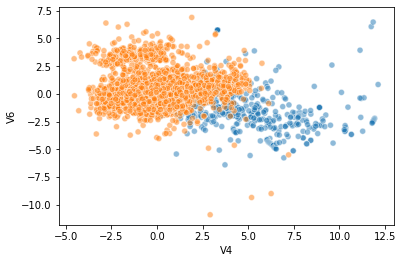

In [8]:
sns.scatterplot(X.V4, X.V6, y, alpha=.5, legend=False)
# plt.savefig("distribution.png", dpi=300)

In [4]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
X_resampled, y_resampled = SMOTE(sampling_strategy='minority').fit_resample(X, y)
X_resampled, y_resampled = SMOTE(sampling_strategy={"Fraud":1000}).fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

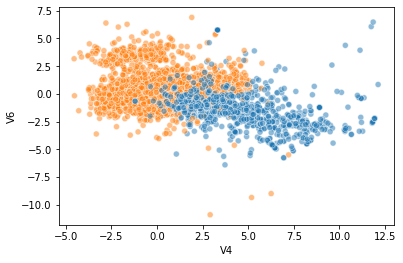

In [9]:
sns.scatterplot(X_resampled.V4, X_resampled.V6, y_resampled, alpha=.5, legend=False)
# plt.savefig("resampled.png", dpi=300)

## 2. Creating New Features

In [39]:
turnover_df = pd.read_csv('turnover.csv')
turnover_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
import featuretools as ft
import pandas as pd

# Create Entity
turnover_df = pd.read_csv('turnover.csv')
es = ft.EntitySet(id = 'Turnover')
es.entity_from_dataframe(entity_id = 'hr', dataframe = turnover_df, index = 'index')

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'hr',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'], verbose=True)

2019-08-09 10:23:23,030 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
Built 668 features
Elapsed: 00:12 | Remaining: 00:00 | Progress: 100%|██████████████████████████████████████████| Calculated: 11/11 chunks


In [58]:
feature_matrix[feature_matrix.columns[10:20]].head()

,average_montly_hours + last_evaluation,number_project + promotion_last_5years,left + promotion_last_5years,average_montly_hours + Work_accident,last_evaluation + Work_accident,number_project + Work_accident,left + Work_accident,average_montly_hours + promotion_last_5years,satisfaction_level + Work_accident,promotion_last_5years + Work_accident
index,,,,,,,,,,
0,157.53,2,1,157,0.53,2,1,157,0.38,0
1,262.86,5,1,262,0.86,5,1,262,0.80,0
2,272.88,7,1,272,0.88,7,1,272,0.11,0
3,223.87,5,1,223,0.87,5,1,223,0.72,0
4,159.52,2,1,159,0.52,2,1,159,0.37,0


## 3. Handling Missing Values

In [ ]:
# explicitly require this experimental feature
# now you can import normally from sklearn.impute
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load data
titanic = pd.read_csv("titanic.csv")
titanic = titanic.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Run imputer with a Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
titanic = pd.DataFrame(imp.fit_transform(titanic), columns=titanic.columns)

## 4. Outlier Detection

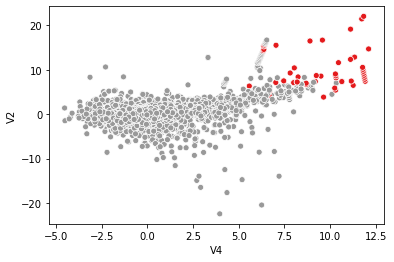

In [22]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import seaborn as sns

credit_card = pd.read_csv('creditcard_small.csv').drop("Class", 1)
clf = IsolationForest(contamination=0.01, behaviour='new')
outliers = clf.fit_predict(credit_card)
sns.scatterplot(credit_card.V4, credit_card.V2, outliers, palette='Set1', legend=False)
# plt.savefig('outliers.png', dpi=300)